In [5]:
from threeML import *
import numpy as np
from threeML.plugins import *
from skylab.datasets import Datasets
from astropy import units as u

import os, sys, glob, abc

def read(filelist):
    data = []
    for f in sorted(filelist):
        x = np.load(f)
        if len(data) == 0: data = x.copy()
        else: data = np.concatenate([data, x])
    return data

# Where is the dataset stored?
dataset = "/data/i3store/users/mjlarson/student_data"

# Read in all of the data files
data_files = dataset + "/IC86_*exp.npy"
exp = read(glob.glob(data_files))

# Read in all of the MC files 
sim_files = dataset + "/IC86*MC*npy"
mc = read(glob.glob(sim_files))

# Set the angular error floor to 0.2 degrees
#exp['angErr'][exp['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)
#mc['angErr'][mc['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)

exp['ra']=np.random.uniform(0,2*np.pi,size=len(exp))
grl = np.load("/data/i3store/users/mjlarson/student_data/GRL/IC86_2012_exp.npy")
livetime = np.sum(grl['livetime'])


In [6]:
from imp import reload
reload(IceCubeLike)

import warnings
warnings.filterwarnings("ignore")
#data = np.random.choice(exp, 10000).copy()
#jl._data_list['test'].llh_model.update_data(data)
IceCube=IceCubeLike.IceCubeLike("test",exp,mc,exp,verbose=True,background_time_profile= (56224,56324))
del mc

In [16]:
source1_sp = Powerlaw()
#source1_sp._set_units(u.GeV,u.cm**-2 / u.s / u.GeV)
source1_sp.K=1e-13
source1_neutrino = Powerlaw()
source1_neutrino._set_units(u.GeV,u.cm**-2 / u.s / u.GeV)
source1_neutrino.piv=1000
source1_neutrino.K=1e-13
source1_neutrino.index=-2
#source1_sp._set_units(u.GeV,u.cm**-2 / u.s / u.GeV)
source1 = PointSource("source1", ra=83.63, dec=22.0145, spectral_shape=source1_sp)
source1_nu = IceCubeLike.NeutrinoPointSource("source1_nu",ra=83.63, dec=22.0145,spectral_shape=source1_neutrino,energy_unit=u.GeV)

model = Model(source1,source1_nu)
model.source1.spectrum.main.Powerlaw.K.fix = True
model.source1.spectrum.main.Powerlaw.index.fix = True
model.source1_nu.spectrum.main.Powerlaw.K.bounds = (1e-30, 1e-5)
model.source1_nu.spectrum.main.Powerlaw.index.bounds = (-4, -1)
#IceCube.set_model(model)
IceCubedata = DataList(IceCube)
jl = JointLikelihood(model, IceCubedata)

In [17]:
test=IceCubeLike.sensitivity(jl)

In [18]:
test.set_backround(grl,model ,time_window=100,start_time=56224)

In [19]:
import mla 
basespectrum = mla.spectral.PowerLaw(1e3 , 1 , -2)
test.set_injection(background_time_profile = (56224,56324))

In [21]:
basespectrum = mla.spectral.PowerLaw(1e3 , 1 , -2)
basespectrum.A=2e-13
test.PS_injector.update_spectrum(basespectrum)
#test.jl_value.llh_model.update_spectrum(basespectrum)
test.jl_value.llh_model.update_data(test.draw_data())
test.jl_value.llh_model.modify_injection(test.draw_signal())
test.jl_value.verbose=True
test.jl.fit()

(39.26756475855868, 405.2717851394508)
(39.596119944704135, 405.6988969309049)
(38.941697031188156, 404.8409063478767)
(39.34179076763593, 405.36891555932345)
(39.19347678660958, 405.17446123394234)
(39.34258621392312, 405.34090595924044)
(39.19272920933268, 405.20233673884263)
(39.3252052210964, 405.32493648068726)
(39.210034102278456, 405.218440311209)
(154.4587251548156, 361.5764231621266)
(58.709048113478794, 418.17408281501025)
(58.821315108539096, 418.2149725367258)
(58.5969922159091, 418.13285582190105)
(58.79968692614799, 418.1722856751609)
(58.61858695846447, 418.1755478526688)
(72.93689964688957, 422.96477641826664)
(82.04297416950605, 423.31356354871036)
(79.40839186932905, 423.3957320511817)
(79.5251157637274, 423.37993689399127)
(79.29183661266144, 423.41124007198613)
(79.50001274907164, 423.35836108998404)
(79.31690892742293, 423.4328459214612)
(79.00830384707014, 426.1156509276176)
(80.67779745649445, 430.01742619544507)
(81.08146042839857, 430.0673873407022)
(81.1813054

,result,unit
parameter,,
source1_nu.spectrum.main.Powerlaw.K,(3.5 -0.6 +0.7) x 10^-19,1 / (cm2 keV s)
source1_nu.spectrum.main.Powerlaw.index,-2.25 +/- 0.06,



Correlation matrix:



1.00,-0.87
-0.87,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
test,-430.323098
total,-430.323098



Values of statistical measures:



,statistical measures
AIC,-862.646195
BIC,-860.646195


(                                                value  negative_error  \
 source1_nu.spectrum.main.Powerlaw.K      3.495930e-19    2.913169e-13   
 source1_nu.spectrum.main.Powerlaw.index -2.246769e+00   -5.694210e-02   
 
                                          positive_error         error  \
 source1_nu.spectrum.main.Powerlaw.K        4.184827e-13  3.548998e-13   
 source1_nu.spectrum.main.Powerlaw.index    5.589258e-02  5.641734e-02   
 
                                                     unit  
 source1_nu.spectrum.main.Powerlaw.K      1 / (cm2 keV s)  
 source1_nu.spectrum.main.Powerlaw.index                   ,
        -log(likelihood)
 test        -430.323098
 total       -430.323098)

(76.49201684726675, 430.3230981923954)

8640000

In [22]:
test.jl_value.verbose=True
test.jl.fit()

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)


RuntimeError: exception was raised in user function
User function arguments:
        source1_nu_spectrum_main_Powerlaw_K = -10.999984
    source1_nu_spectrum_main_Powerlaw_index = -2.000000
Original python exception in user function:
KeyboardInterrupt: 
  File "/data/disk01/home/jasonfan/threeML/threeML/classicMLE/joint_likelihood.py", line 745, in minus_log_like_profile
    this_log_like = dataset.inner_fit()
  File "/data/disk01/home/jasonfan/threeML/threeML/plugins/IceCubeLike.py", line 316, in inner_fit
    return self.get_log_like()
  File "/data/disk01/home/jasonfan/threeML/threeML/plugins/IceCubeLike.py", line 309, in get_log_like
    self.update_model()
  File "/data/disk01/home/jasonfan/threeML/threeML/plugins/IceCubeLike.py", line 300, in update_model
    self.llh_model.update_spectrum(self.spectrum)
  File "/data/disk01/home/jasonfan/umd_icecube_analysis_tutorial/mla/mla/core.py", line 317, in update_spectrum
    self.update_energy_histogram()
  File "/data/disk01/home/jasonfan/umd_icecube_analysis_tutorial/mla/mla/core.py", line 398, in update_energy_histogram
    sig_w/=np.sum(self.fullsim['ow'] * self.spectrum(self.fullsim['trueE']))
  File "/data/disk01/home/jasonfan/threeML/threeML/plugins/IceCubeLike.py", line 216, in __call__
    return self.model._point_sources[self.neutrinopointsource].call(E)*self.A
  File "/data/disk01/home/jasonfan/threeML/threeML/plugins/IceCubeLike.py", line 150, in call
    results = [component.shape(x) for component in list(self.components.values())]
  File "/data/disk01/home/jasonfan/threeML/threeML/plugins/IceCubeLike.py", line 150, in <listcomp>
    results = [component.shape(x) for component in list(self.components.values())]
  File "/data/disk01/home/jasonfan/miniconda3/envs/p3/lib/python3.6/site-packages/astromodels/functions/function.py", line 911, in __call__
    return self.fast_call(x)
  File "/data/disk01/home/jasonfan/miniconda3/envs/p3/lib/python3.6/site-packages/astromodels/core/memoization.py", line 58, in memoizer
    return method(instance, x, *args, **kwargs)
  File "/data/disk01/home/jasonfan/miniconda3/envs/p3/lib/python3.6/site-packages/astromodels/functions/function.py", line 986, in fast_call
    return self.evaluate(x, *values)
  File "/data/disk01/home/jasonfan/miniconda3/envs/p3/lib/python3.6/site-packages/astromodels/functions/functions.py", line 212, in evaluate
    return K * np.power(xx, index)


In [84]:
K=np.linspace(5e-14,1e-12,50)
gamma=np.linspace(-1,-4,30)
ns=np.linspace(0,60,50)
result=[]

In [85]:
for j in gamma:
    source1_neutrino = Powerlaw()
    source1_neutrino._set_units(u.GeV,u.cm**-2 / u.s / u.GeV)
    source1_neutrino.piv=1000
    source1_neutrino.index=j
    source1_nu = IceCubeLike.NeutrinoPointSource("source1_nu",ra=83.63, dec=22.0145,spectral_shape=source1_neutrino)
    model = Model(source1_nu)
    test.jl_value.set_model(model)
    test.jl_value.update_model()
    print(temp)
    for i in K:
        source1_neutrino.K=i
        ns = (test.jl_value.llh_model.sim['ow'] * source1_neutrino(test.jl_value.llh_model.sim['trueE']) * test.jl_value.llh_model.signal_time_profile.effective_exposure() *24*3600).sum() 
        temp=test.jl_value.llh_model.eval_llh_ns(ns)
        result.append([i,j,temp[0],temp[1]])

(0, 0)
(0, 0)
(0, 0)
(31163.715050265746, -156320.11871407105)
(15329.461798048338, -39035.57467847447)
(7903.742071415049, -16667.058611707806)
(4276.1456341092235, -7948.573948503566)
(2429.4119427640485, -3932.9932468117563)
(1449.6754848903897, -1923.919399391766)
(908.2414412483802, -865.3671200423256)
(596.869559378092, -287.7747418034985)
(410.83063201792135, 34.44684798035314)
(295.6116456729889, 215.76291406686704)
(221.86389047078723, 316.7933330810213)
(173.25954858240829, 370.81899879116105)
(140.42383585679616, 396.7001548138907)
(117.81100239761359, 405.43448452267523)
(102.04826570970049, 403.6020953288089)
(91.03266369381231, 395.23029649378975)
(83.42491668516428, 382.8308368698767)
(78.35836376289431, 367.9915502281756)
(75.2675288451841, 351.7218727579739)
(73.7849723615847, 334.6590523044466)
(73.6781347647412, 317.1934838713842)
(74.81022186850699, 299.5456513550512)
(77.11595113898618, 281.812898416763)
(80.58677847076456, 263.99634159515665)
(85.2624099353913, 24

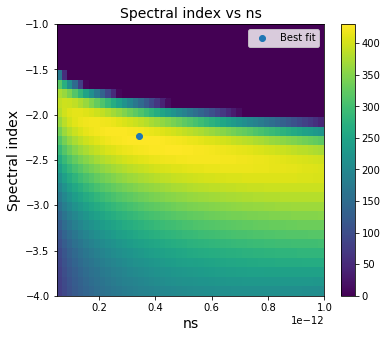

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
result=np.array(result)
x=result[:,0]
y=result[:,1]
z=result[:,3]

## Equivalently, we could do that all in one line with:
# x,y,z = np.genfromtxt('eye_.txt', delimiter=',', usecols=(0,1,2))
z[z<0]=0
x=np.unique(x)
y=np.unique(y)
X,Y = np.meshgrid(x,y)

Z=z.reshape(len(y),len(x))
index=result[np.argmax(result[:,3])]
fig, ax = plt.subplots(figsize = (6,5))
plt.pcolormesh(X,np.flip(Y),Z)
plt.colorbar()
plt.scatter(index[0],index[1],label="Best fit")
plt.title("Spectral index vs ns",fontsize=14)
plt.xlabel("ns",fontsize=14)
plt.ylabel("Spectral index",fontsize=14)
plt.legend()
plt.show()

In [69]:
z=np.hs([z,1])

array([123.25034279, 143.72195794, 151.87625222, ...,   0.        ,
         0.        ,   1.        ])

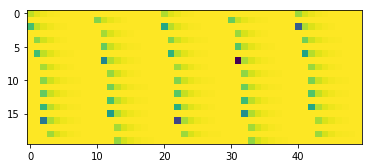

In [65]:
plt.imshow(Z)

In [47]:
x

array([-3.78989065e+04, -1.50000000e+00,  1.00000000e-07,  1.49295808e+04])

In [20]:
test.jl._likelihood_model.free_parameters['source1_nu.spectrum.main.Powerlaw.K']

Parameter K = 6.99812795084103e-06 [1 / (cm2 keV s)]
(min_value = 1e-30, max_value = 1e-05, delta = 2.5e-10, free = True)